# Preprocessing and EDA

In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Basic cleaning

In [54]:
# Read data frame
data = pd.read_csv('strokedata.csv', encoding = 'utf-8')
data = data.drop('id', axis=1)  # drop id column

# Convert binary categorical variables to dummy variables
data = data[(data.gender=='Male')|(data.gender=='Female')] # drop only gender = other obs
data['gender'] = np.where(data['gender'] == 'Male', 1, 0)
data['ever_married'] = np.where(data['ever_married'] == 'Yes', 1, 0)
data['Residence_type'] = np.where(data['Residence_type'] == 'Urban', 1, 0)
data = data.rename({'Residence_type':'urban_residence'}, axis=1)  # Rename column

# Drop NAs
print('Dropping missing values:\n{}'.format(data.isnull().sum()[data.isnull().sum() > 0]))
data = data.dropna().reset_index(drop=True)
data

Dropping missing values:
bmi    201
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
4904,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
4905,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
4906,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


## 2. Summary statistics and plots

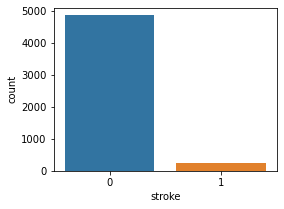

In [9]:
# Countplot of target variable
fig = plt.figure(figsize=(4,3))
sns.countplot(x='stroke', data=data)
plt.show()

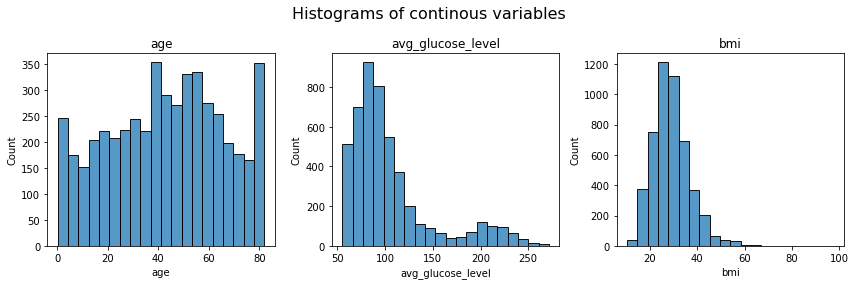

In [57]:
# plot histogram of all continous columns
cont_vars = data[['age', 'avg_glucose_level', 'bmi']]

fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i, col in enumerate(cont_vars.columns):
    sns.histplot(ax=axs[i], x=col, data=data, bins=20)
    axs[i].set_title(col)
fig.suptitle('Histograms of continous variables', fontsize=16)
plt.tight_layout()
plt.show()

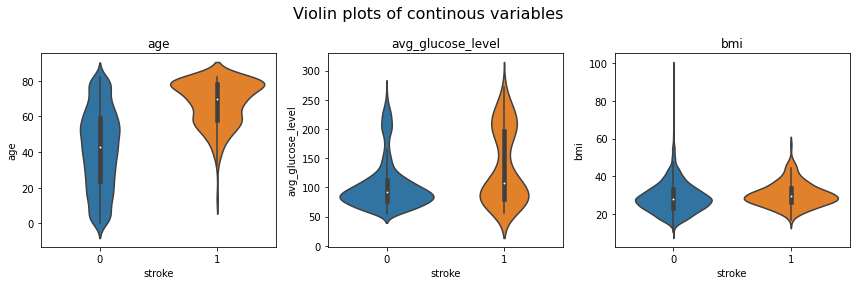

In [58]:
# plot boxplot of all continous columns
cont_vars = data[['age', 'avg_glucose_level', 'bmi']]

fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i, col in enumerate(cont_vars.columns):
    sns.violinplot(ax=axs[i], y=col, x='stroke', data=data)
    axs[i].set_title(col)
fig.suptitle('Violin plots of continous variables', fontsize=16)
plt.tight_layout()
plt.show()

In [51]:
data.gender.value_counts()

0    2898
1    2011
Name: gender, dtype: int64